# Error convergence: ELM-ODE, SWIM-ODE 

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import json

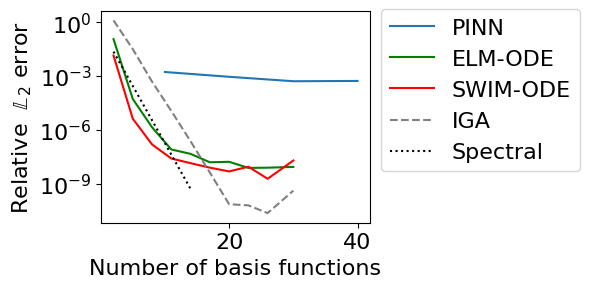

In [22]:
# Use default Latex
rc_fonts = {
    "text.usetex": False,
}
plt.rcParams.update(rc_fonts)

# Load data for SWIM-ODE and ELM-ODE
adv_err_width = np.load('adv_rel_err_width.npy')
width = adv_err_width[0, :] # width
l2_rel_err_elm = adv_err_width[1, :] # ELM-ODE error 
l2_rel_err_swim = adv_err_width[2, :]  # SWIM-ODE error

# load data for iga
def parse_json(filename: str) -> dict:
    with open(filename) as f:
        content = json.load(f)
    return content
iga = parse_json("advection_periodic_beta_40.json")

#PINN

neurons = [10, 20, 30, 40]
PINN_rel_err_mean = [0.0017, 0.00092, 0.00052, 0.00054]


#PINN
neurons = [10, 20, 30, 40]
PINN_rel_err_mean = [0.0017, 0.00092, 0.00052, 0.00054]

# Spectral convergence line
pt_1 = 0
pt_2 = 3
x1 = width[pt_1]
x2 = width[pt_2]
y1 = l2_rel_err_swim[pt_1]
y2 = l2_rel_err_swim[pt_2]
# Compute the slope and intercept of the line (y = mx + c)
m = (np.log(y2) - np.log(y1)) / (x2 - x1)  # Using log to convert to semilogy plot
c = np.log(y1) - m * x1 + 0.5
# Define x-values for the line
x_values = width[:pt_2+2] #np.linspace(x1, x2, 100)
# Calculate corresponding y-values using the equation of the line
y_values = np.exp(m * x_values + c)  # Exponentiating to revert back from log scale


# Plot convergence plots
fig, ax = plt.subplots(1, 1, figsize=(6, 3), sharey=True)
ax = plt.gca()
fontsize = 16
n_s = np.asarray(width)
ax.semilogy(neurons, PINN_rel_err_mean)
ax.semilogy(adv_err_width[0, :], adv_err_width[1, :], c='green')
ax.semilogy(adv_err_width[0, :], adv_err_width[2, :], c='red')
ax.semilogy(iga["number"], iga["relative_l2"], label="IGA", c='gray', linestyle='--')
ax.semilogy(x_values, y_values, ':', label='Spectral convergence', c='k')# * 50
#ax.legend(["PINN", "ELM-ODE", "SWIM-ODE", "IGA", "Spectral convergence"], frameon=False, loc='upper center', fontsize=fontsize, ncol=2) #"ELM-min", "SWIM-min", 
ax.set_xlabel('Number of basis functions', fontsize=fontsize)
ax.set_ylabel(r'Relative  ' + r'$\mathbb{L}_{2}$ ' + r'error', fontsize=fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
plt.legend(["PINN", "ELM-ODE", "SWIM-ODE", "IGA", "Spectral"], bbox_to_anchor=(1, 1.06), loc='upper left',fontsize=fontsize,)
fig.tight_layout()
plt.savefig('convergence_plot_adv.pdf')